In [1]:
import numpy as np
import gdal
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
import bisect
import functools
import itertools
import pickle as pkl
import time
from IPython.display import clear_output
%matplotlib inline
from PIL import Image
import sklearn
import skimage

In [2]:
# compose band and mask images into one image
combined = {}
image_dir = "2014/images/"
mask_dir = "2014/masks/"
for fn in os.listdir(image_dir):
    raw_img = gdal.Open(image_dir + fn)
    arr_img = raw_img.ReadAsArray()
    raw_msk = gdal.Open(mask_dir + fn)
    arr_msk = raw_msk.ReadAsArray()
    combined[fn.split('.')[0]] = np.concatenate((arr_img, arr_msk), axis=0)
    
combined_new = {}
image_dir = "2015/images/"
mask_dir = "2015/masks/"
for fn in os.listdir(image_dir):
    raw_img = gdal.Open(image_dir + fn)
    arr_img = raw_img.ReadAsArray()
    raw_msk = gdal.Open(mask_dir + fn)
    arr_msk = raw_msk.ReadAsArray()
    combined_new[fn.split('.')[0]] = np.concatenate((arr_img, arr_msk), axis=0)
    
table = pd.read_csv('2014/tables/LC8_SR.csv')
time_start = table[['system:index', 'system:time_start']]
table_new = pd.read_csv('2015/tables/LC8_SR.csv')
time_start_new = table_new[['system:index', 'system:time_start']]

ds = {}
for k, v in combined.items():
    ts = time_start[time_start['system:index'] == k]['system:time_start'].iloc[0]
    ds[ts] = v
    
ds_new = {}
for k, v in combined_new.items():
    ts = time_start_new[time_start_new['system:index'] == k]['system:time_start'].iloc[0]
    ds_new[ts] = v

In [3]:
ds.keys()

dict_keys([1410998985984, 1399939752769, 1408839353835, 1414368960709, 1404692138926, 1417910986952, 1422058174921, 1404086963402, 1417133760843, 1402704560525, 1412986561487, 1398557367125, 1397780144150, 1421280950873, 1393632987225, 1419898551514, 1413763792495, 1395015377948, 1410221757598, 1418516154655, 1406074541664, 1415146191267, 1406851776359, 1405469370600, 1420675781417, 1399162529511, 1400544919916, 1394410211566, 1416528587183, 1419293385395, 1412381389175, 1415751363029, 1408234182394, 1409616584607, 1401927327676, 1395792595786, 1422663346261, 1401322152255])

In [14]:
ds[1417133760843].shape

(5, 973, 1022)

In [20]:
img = ds[1417133760843]
img = np.rollaxis(img, 0, 3)

In [21]:
img.shape

(973, 1022, 5)

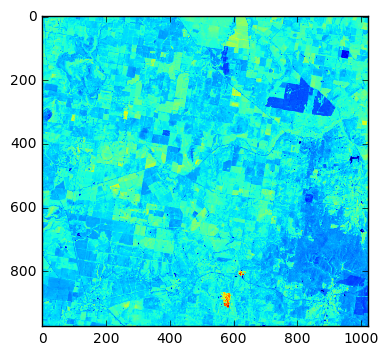

In [40]:
plt.imshow(img[:, :, 0])

In [91]:
from skimage.segmentation import felzenszwalb, find_boundaries

In [52]:
stimg = img.copy().astype(np.float)
min_val = np.min(stimg[:, :, :3], axis=(0, 1))
max_val = np.max(stimg[:, :, :3], axis=(0, 1))
stimg[:, :, :3] = (stimg[:, :, :3] - min_val) / (max_val - min_val)

In [53]:
stimg.shape

(973, 1022, 5)

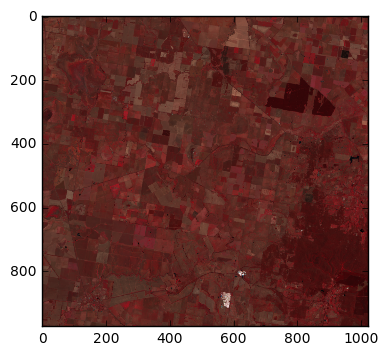

In [54]:
plt.imshow(stimg[:, :, :3])

In [92]:
seg = felzenszwalb(stimg[:, :, :3], scale=2, sigma=2)

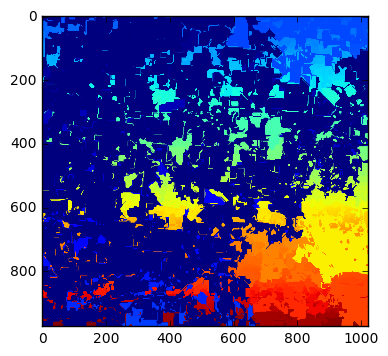

In [93]:
plt.imshow(seg)

In [89]:
from skimage.segmentation import slic

In [96]:
seg = slic(stimg[:, :, :3], n_segments=1000, max_iter=20)

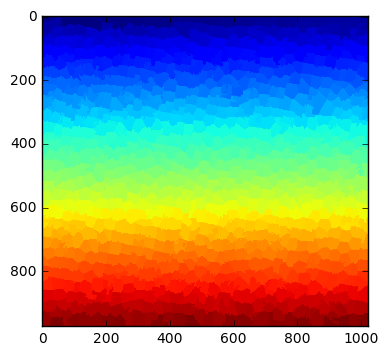

In [97]:
plt.imshow(seg)

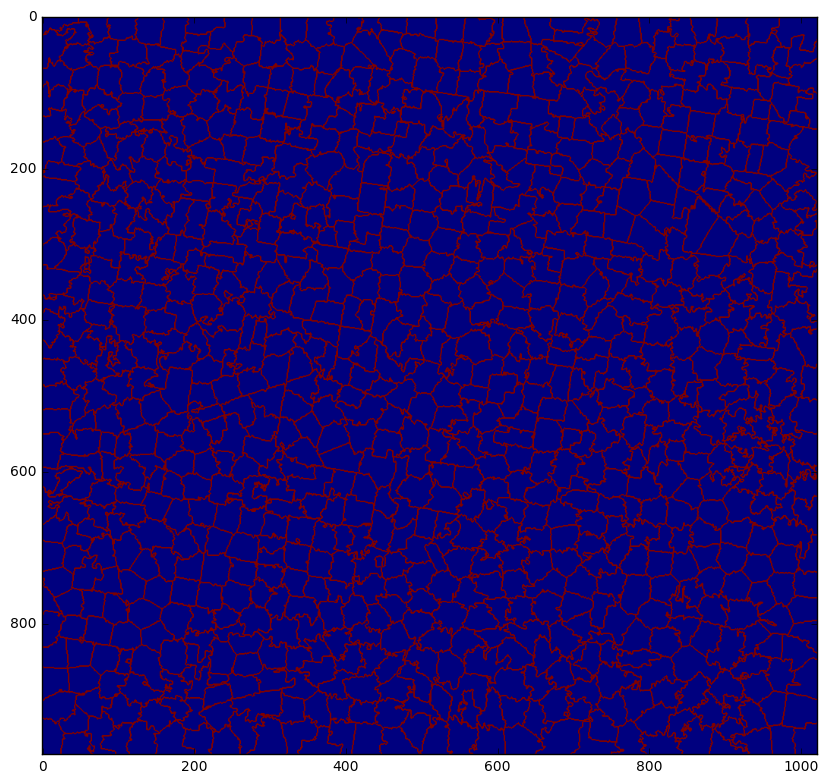

In [98]:
plt.figure(figsize=(10, 10))
plt.imshow(find_boundaries(seg))